In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

## Read in Data

In [42]:
df = pd.read_csv('./data/final.csv')

In [43]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Year
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990.0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990.0
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990.0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,1990.0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,1990.0


## Train-Test-Split

In [44]:
X = df.drop(columns = ['track', 'artist', 'uri', 'target'])
y = df['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [46]:
y.value_counts(normalize = True)

0    0.5
1    0.5
Name: target, dtype: float64

## Model 1: Random Forest Classifier + Gridsearch

In [47]:
rf = RandomForestClassifier()

In [48]:
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
}

In [49]:
gs = GridSearchCV(rf, param_grid=params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8033085973496817


{'max_depth': None, 'n_estimators': 150}

In [50]:
gs.score(X_train, y_train)

0.9996046709646028

In [51]:
gs.score(X_test, y_test)

0.8081975188518609

In [52]:
pred = gs.predict(X_test)

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


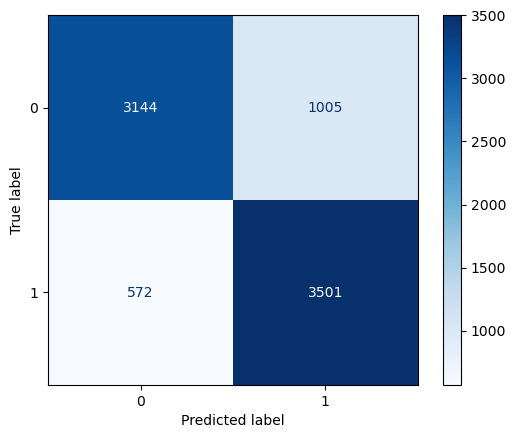

In [54]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [55]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.7577729573391179


In [56]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.8081975188518609
F1 Score: 0.816179041846369


## Model 2: Random Forest + Standard Scaling

In [57]:
rf = RandomForestClassifier()

In [58]:
# Create a StandardScaler object
sc = StandardScaler()

# Standardize the training and test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [59]:
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
}

In [60]:
gs = GridSearchCV(rf, param_grid=params, cv=5)
gs.fit(X_train_sc, y_train)
print(gs.best_score_)
gs.best_params_

0.8029741307076529


{'max_depth': None, 'n_estimators': 200}

In [61]:
pred = gs.predict(X_test_sc)

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


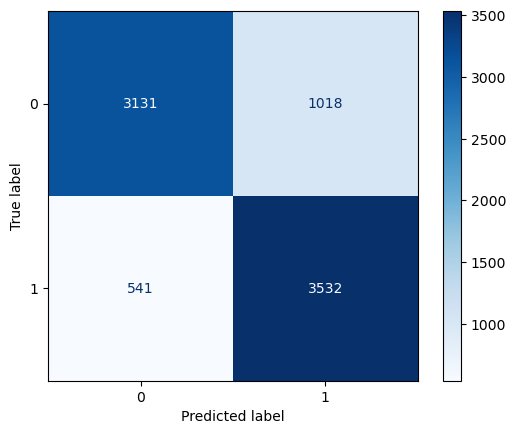

In [63]:
plot_confusion_matrix(gs, X_test_sc, y_test, cmap='Blues', values_format='d');

In [64]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.7546396722101711


In [65]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.8103867672099246
F1 Score: 0.8192044532065406


### Feature Importances

In [66]:
# Create a StandardScaler object
sc = StandardScaler()

# Standardize the training and test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [67]:
rf = RandomForestClassifier(max_depth= None, n_estimators = 150)

In [68]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier(n_estimators=150)

In [69]:
importances = rf.feature_importances_

In [70]:
indices = np.argsort(importances)[::-1]

In [71]:
column_titles = {i: title for i, title in enumerate(X.columns)}

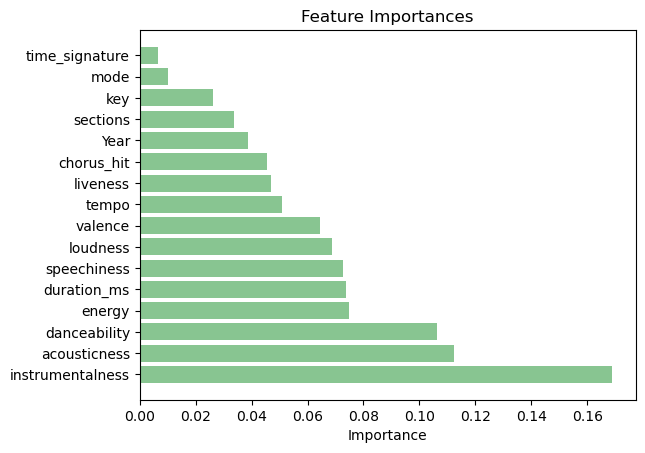

In [91]:
plt.figure()
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align='center', color='#88c591')
plt.yticks(range(X.shape[1]), [column_titles[i] for i in indices])
plt.xlabel('Importance')
plt.show()